# CASA Practical 4 Part 2: Neural networks using Keras and Yolo

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-02-02 13:45:00.657161: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-02 13:45:00.979458: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 13:45:00.979488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 13:45:01.014967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 13:45:01.091370: I tensorflow/core/platform/cpu_feature_guar

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


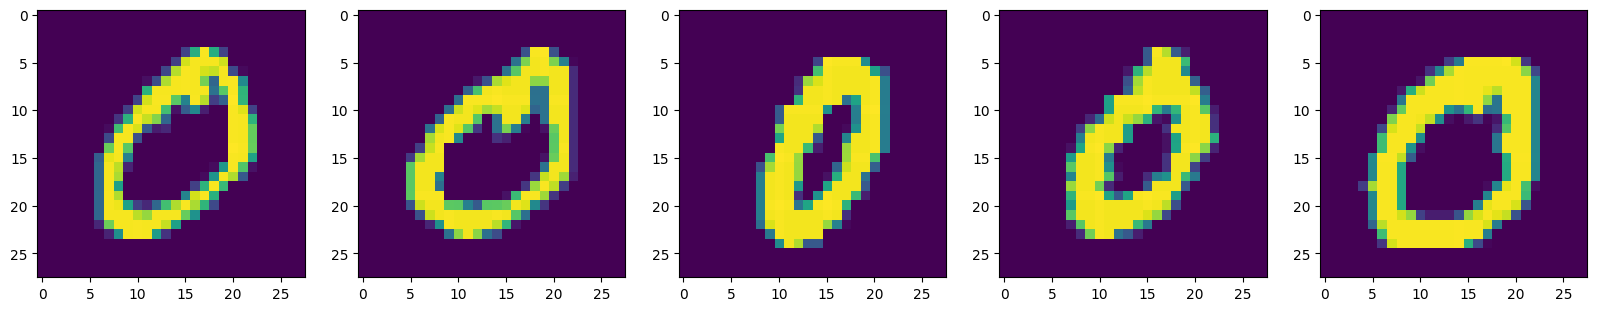

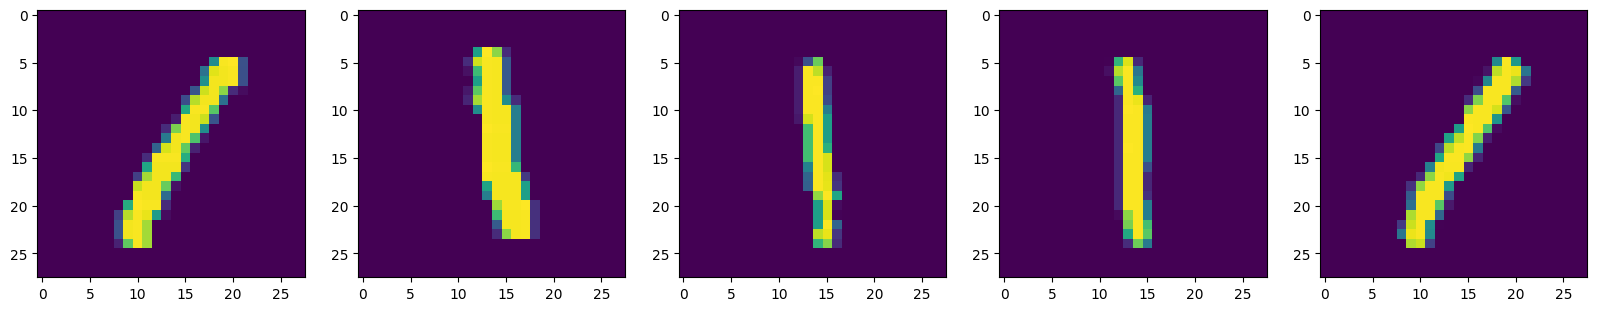

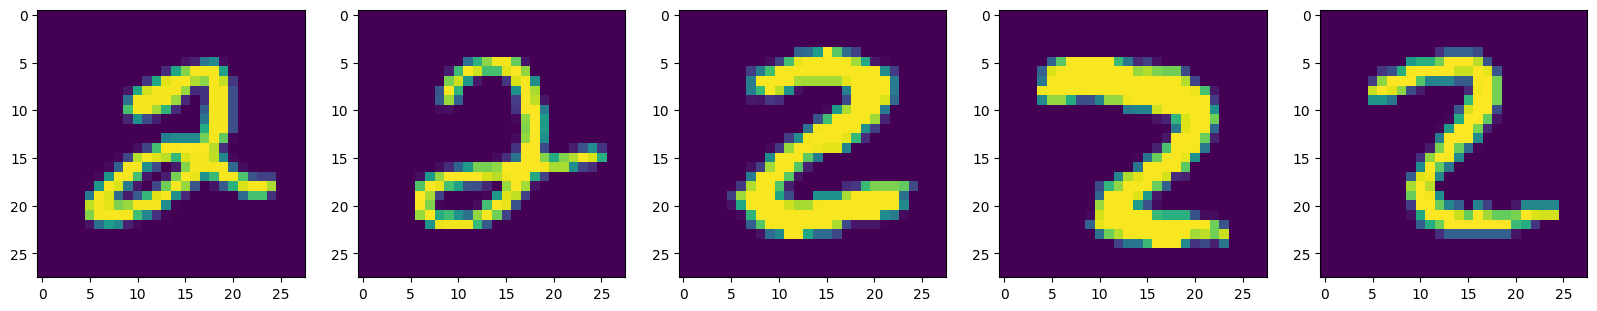

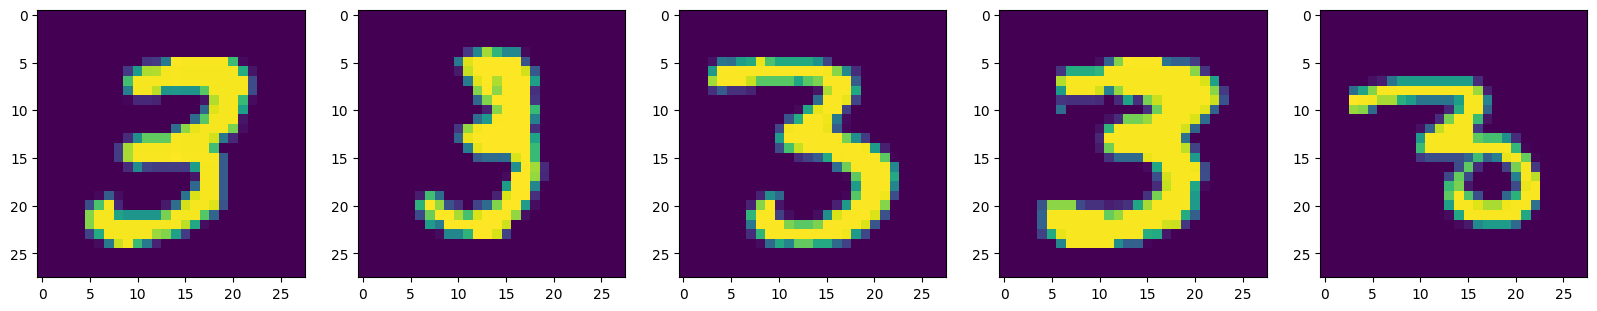

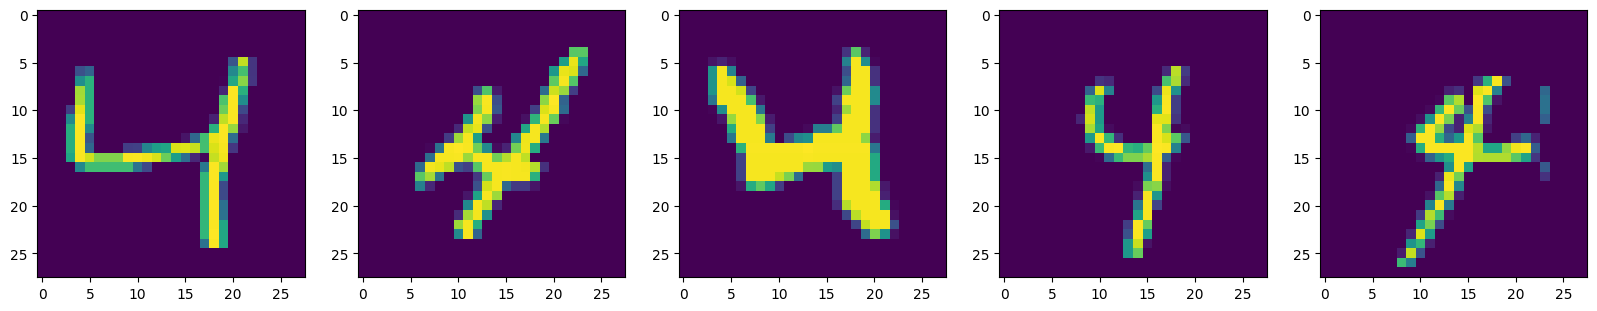

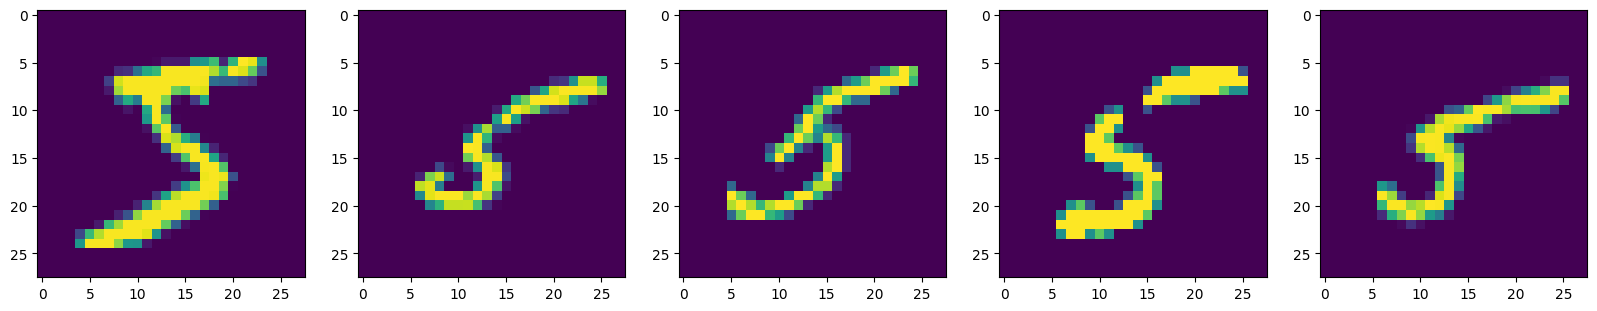

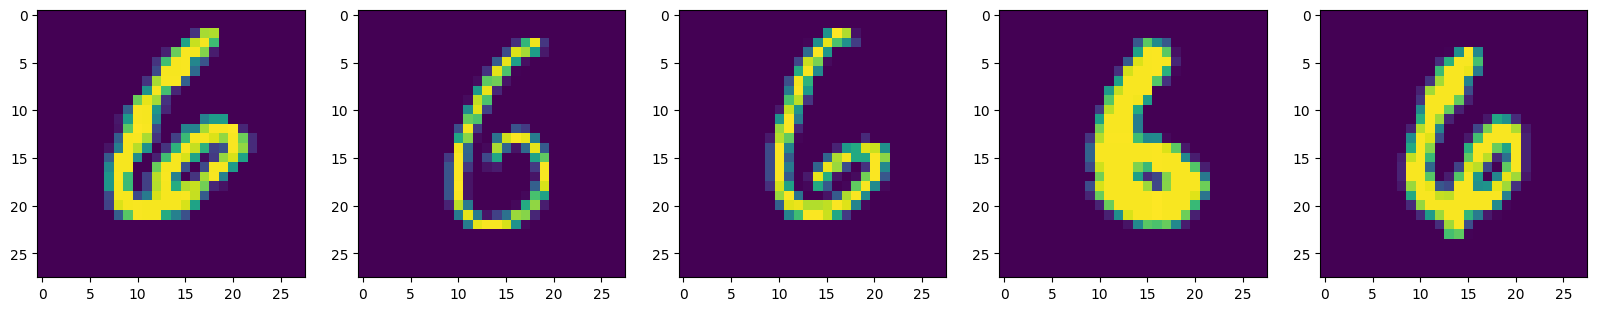

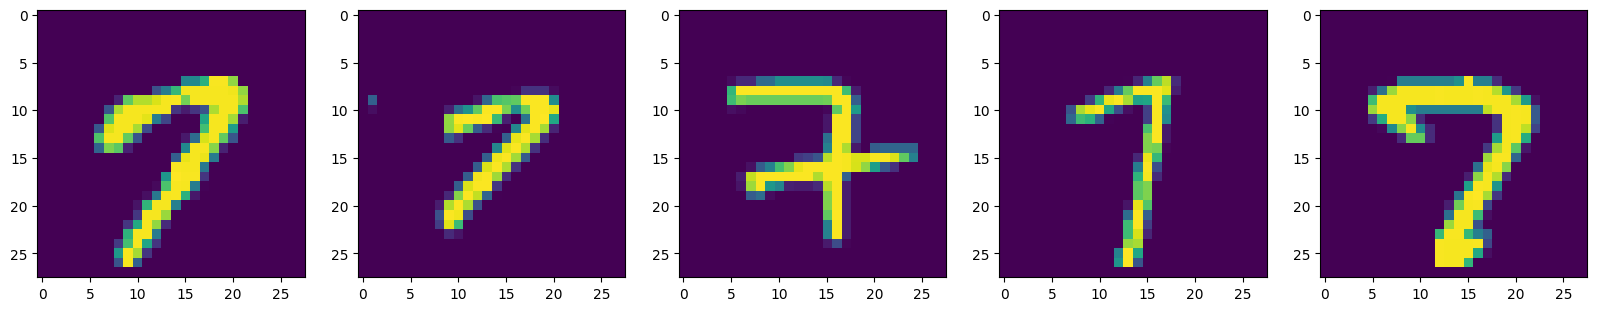

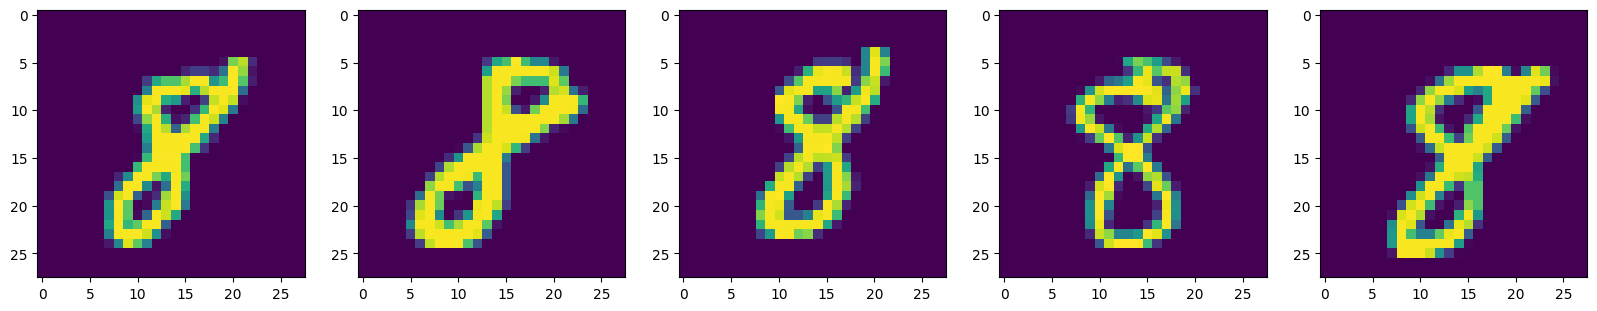

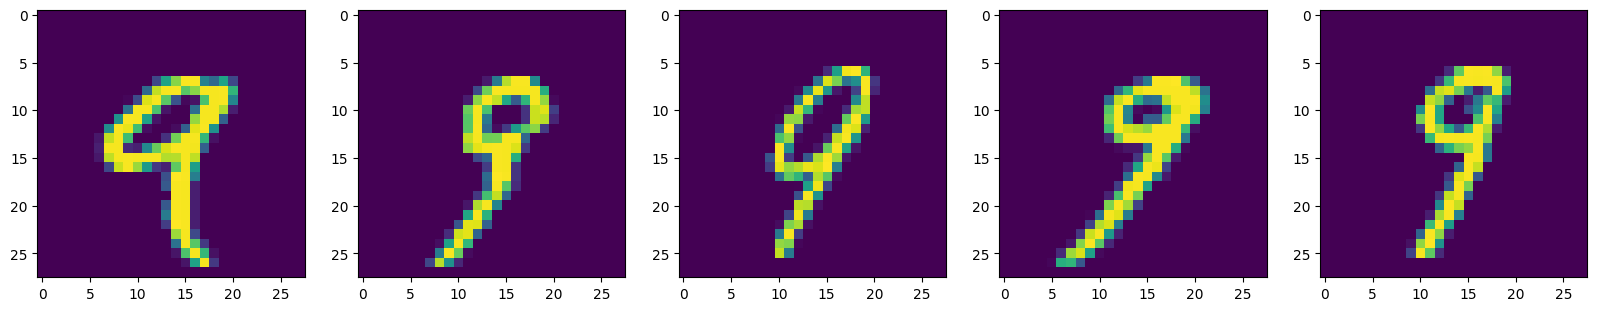

In [3]:
def plot_num(number):

  item_index = np.where(y_train[:1000]==number)
  subset=x_train[item_index]

  egs=5
  fig, axs = plt.subplots(1,egs, figsize=(20,10))

  for i in range(0,egs):
    axs[i].imshow(subset[i])


for x in range(0,10):
  plot_num(x)

## Build a machine learning model

Build a tf.keras.Sequential model by stacking layers.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.13674493, -0.07787684, -0.8076573 , -0.9284048 , -0.3685256 ,
         0.07650769,  0.6878946 ,  0.86680263, -0.19154418, -0.25675035]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.1076355 , 0.08684533, 0.04186074, 0.0370994 , 0.06494105,
        0.10134325, 0.18677415, 0.22336523, 0.07751422, 0.07262108]],
      dtype=float32)

Note: It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using losses.SparseCategoricalCrossentropy, which takes a vector of logits and a True index and returns a scalar loss for each example.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

2.289242



Before you start training, configure and compile the model using Keras Model.compile. 
Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.


In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the Model.fit method to adjust your model parameters and minimize the loss:

In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1416 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1062 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0566 - accuracy: 0.9822
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9830
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9844
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.042

In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0777 - accuracy: 0.9780 - 426ms/epoch - 1ms/step


[0.07767650485038757, 0.9779999852180481]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

313/313 [==============================] - 1s 2ms/step
9


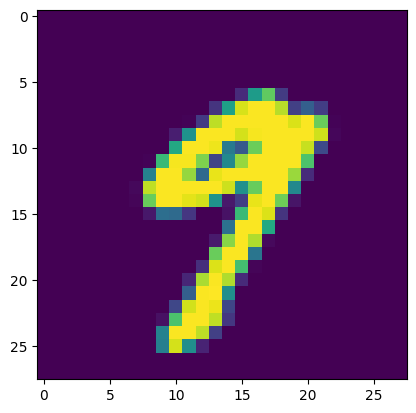

In [13]:
#probability_model(x_test[:1])
predictions=probability_model.predict(x_test)

index=20

print(np.argmax(predictions[index]))
plt.imshow(x_test[index])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the Keras API.

For more examples of using Keras, check out the tutorials. To learn more about building models with Keras, read the guides. If you want learn more about loading and preparing data, see the tutorials on image data loading or CSV data loading.

In [1]:


!git clone https://github.com/huanfachen/yolov5_RS  # clone repo
#%cd yolov5_RS
%pip install -qr yolov5_RS/requirements.txt # install dependencies
%pip install -q roboflow

Cloning into 'yolov5_RS'...


remote: Enumerating objects: 11625, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11625 (delta 0), reused 0 (delta 0), pack-reused 11622
Receiving objects: 100% (11625/11625), 77.52 MiB | 1.78 MiB/s, done.
Resolving deltas: 100% (7685/7685), done.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.2+cu121 (CPU)


In [3]:
from roboflow import Roboflow
API_KEY = 'aywzIBJkeuu2TcHztYSq'
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("gdit").project("aerial-airport")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aerial-Airport-1 in yolov5pytorch:: 100%|██████████| 1632/1632 [00:00<00:00, 13517.78it/s]


In [4]:


!ls
!ls yolov5_RS



 Aerial-Airport-1	  diy_func		    wk3_tree.ipynb
'Module Overview.ipynb'   pokemon_classifier	    wk4_part_b.ipynb
 README.md		  svm			    wk4_practical.ipynb
 RL			  watermelon_book	    wk5_analysis_workflow.ipynb
 causal_inference	  wk2_supervised_ml.ipynb   yolov5_RS
CITATION.cff	 benchmarks.py	gatwick.jpg	  setup.cfg	  weights
CONTRIBUTING.md  classify	hubconf.py	  train.py
LICENSE		 data		models		  tutorial.ipynb
README.md	 detect.py	requirements.txt  utils
README.zh-CN.md  export.py	segment		  val.py


In [5]:
!cp -r Aerial-Airport-1 yolov5_RS

In [6]:
!ls
!ls yolov5_RS

 Aerial-Airport-1	  diy_func		    wk3_tree.ipynb
'Module Overview.ipynb'   pokemon_classifier	    wk4_part_b.ipynb
 README.md		  svm			    wk4_practical.ipynb
 RL			  watermelon_book	    wk5_analysis_workflow.ipynb
 causal_inference	  wk2_supervised_ml.ipynb   yolov5_RS
Aerial-Airport-1  README.zh-CN.md  export.py	     segment	     val.py
CITATION.cff	  benchmarks.py    gatwick.jpg	     setup.cfg	     weights
CONTRIBUTING.md   classify	   hubconf.py	     train.py
LICENSE		  data		   models	     tutorial.ipynb
README.md	  detect.py	   requirements.txt  utils


In [7]:
!python yolov5_RS/train.py --data {dataset.location}/data.yaml --batch 32 --cache

/bin/bash: line 1: python: command not found


In [8]:
img='gatwick.jpg'
!python yolov5_RS/detect.py --weights yolov5_RS/weights/general.pt --img 2000 --conf 0.4 --source {os.path.join('yolov5_RS',img)} --line-thickness 2 --exist-ok #--hide-labels --exist-ok

/bin/bash: line 1: python: command not found


In [9]:
!ls yolov5_RS/runs/detect/exp

ls: cannot access 'yolov5_RS/runs/detect/exp': No such file or directory


In [10]:
img='gatwick.jpg'

In [11]:


out_dir='yolov5_RS/runs/detect/exp'
Image(filename=os.path.join(out_dir,img))

FileNotFoundError: [Errno 2] No such file or directory: 'yolov5_RS/runs/detect/exp/gatwick.jpg'

In [16]:
workspace = rf.workspace()
workspace

AttributeError: module 'roboflow' has no attribute 'workspace'

In [17]:


from roboflow import Roboflow
rf = Roboflow(api_key="<API Key>")
project = rf.workspace('ibl-huczk').project("ships-2fvbx")
dataset = project.version("1").download("yolov5")



RuntimeError: {
    "error": {
        "message": "This API key does not exist (or has been revoked).",
        "status": 401,
        "type": "OAuthException",
        "hint": "You may retrieve your API key via the Roboflow Dashboard. Go to Account > Roboflow Keys to retrieve yours.",
        "key": "<API Key>"
    }
}

In [ ]:
!python yolov5_RS/train.py --data {dataset.location}/data.yaml --batch 32 --cache

In [ ]:
img='boneyard.jpg'
!python yolov5_RS/detect.py --weights yolov5_RS/weights/general.pt --img 2000 --conf 0.4 --source {img} --line-thickness 2 --exist-ok #--hide-labels --exist-ok

In [ ]:


out_dir='yolov5_RS/runs/detect/exp'
Image(filename=os.path.join(out_dir,img))

